## SVM( support vector machine )
마진을 최대로 하는 결정경계 찾기(분류★, 회귀)
+ 마진 = ㅣ결정경계 - 서포트 벡터ㅣ
+ 결정경계: 서로 다른 분류값을 결정짓는 경계( line, plane(2D), hyperplane(3D) )
+ 서포트벡터: 결정경계를 만드는데 영향을 주는 데이터
* 초평면: 최적으로 분류할 수 있는 ``직선``을 통해 나눠진 영역(선형 분류)
- 예) 이미지, 필체패턴 인식

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
from sklearn.svm import SVC

# 1. 결정경계(선형)

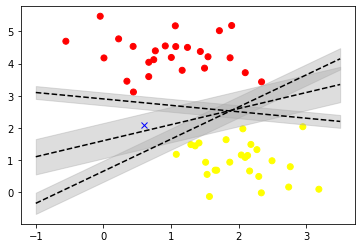

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
     cluster_std=0.6, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

plt.plot([0.6],[2.1], 'x', color='blue') # 테스트 점

xfit = np.linspace(-1, 3.5)
for m,b,d in [(1,0.65,0.33), (0.5,1.6,0.55),
              (-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k--')
    plt.fill_between(xfit, yfit-d, yfit+d,
          color='#AAAAAA', alpha=0.4)

## 최적의 결정경계(선형)

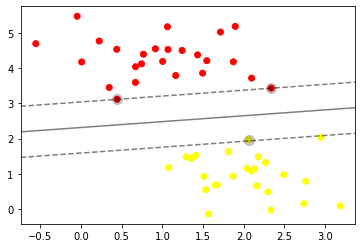

In [5]:
# 모델 학습
svclf = SVC(kernel='linear')  # kernal='결정경계 종류'
svclf.fit(X, y)

# 시각화
import svm_visual # svm_visual 파일 넣어놓기

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.scatter(svclf.support_vectors_[:, 0],
            svclf.support_vectors_[:, 1], s=100,
            facecolor='k', alpha=0.2)  # 서포트벡터

svm_visual.plot_svc_decision_function(svclf)

In [6]:
# 학습 결과
print(svclf.coef_[0][0], svclf.coef_[0][1])
print(svclf.intercept_[0])
print(svclf.support_vectors_)
print(svclf.score(X, y))

0.22967329367066203 -1.3775826241987321
3.189713537020001
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
1.0


# 2. 결정경계(비선형)

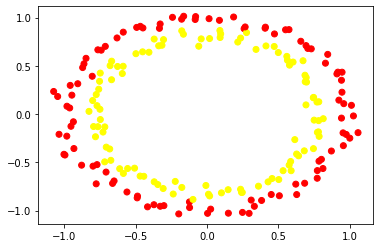

In [7]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200,
        noise=0.04, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

/tmp/ipykernel_10740/4041973115.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


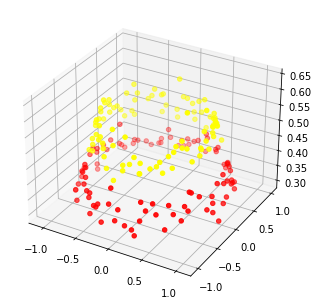

In [8]:
## 2차원 -> 3차원 & 시각화
from mpl_toolkits.mplot3d import Axes3D

X, y = make_circles(n_samples=200, noise=0.04, random_state=0)

# 커널 함수 : 저차원(2) -> 고차원(3) 매핑
z = np.exp(-(X ** 2).sum(1))

# 시각화(3차원)
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')

## 최적의 결정경계(비선형)

/home/centos/머신러닝/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


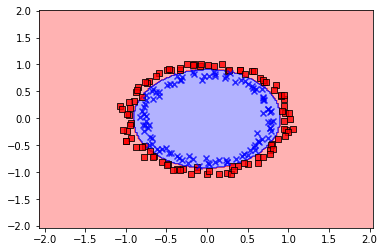

In [9]:
svclf = SVC(kernel='rbf', 
            C=10  # C(cost): 정확도
            , gamma=0.1  # gamma: 결정경계 곡률(마진) - 감마↑ 결정경계↓
            , random_state=0)
svclf.fit(X, y)
# svclf.score(X, y)

# 시각화
svm_visual.plot_decision_regions(X, y, svclf)

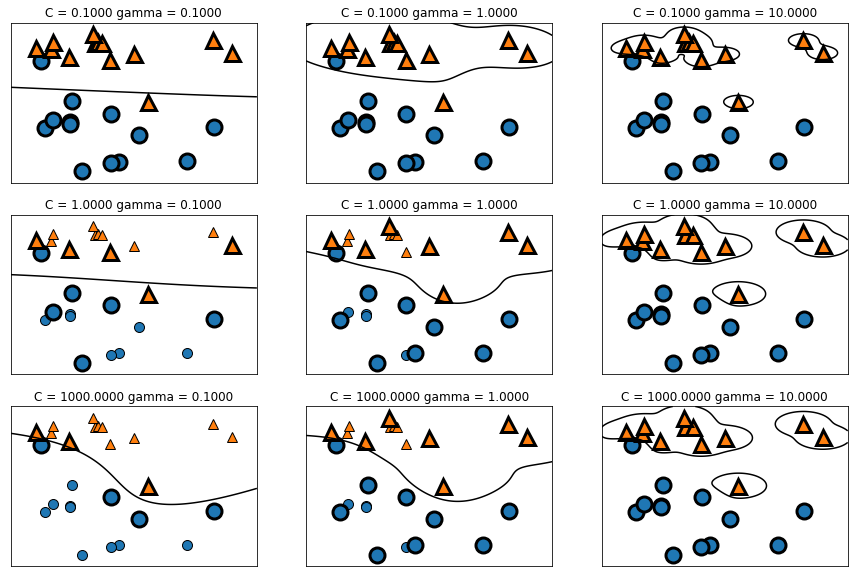

In [10]:
# C(cost) : 정확도
# gamma   : 결정경계 곡률(마진) - 감마↑ 결정경계↓

import mglearn

fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
       mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

# 연습문제 - iris 데이터 결정경계

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
# data = iris.data[:, :2]  # sepal
data = iris.data[:, 2:]  # petal
target = iris.target  # petal

# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3,
                random_state=2209011600, stratify=target)

In [12]:
# 선형
svclf1 = SVC(kernel='linear')
svclf1.fit(Xtrain, ytrain)
pred = svclf1.predict(Xtest)

print(svclf1.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9714285714285714 0.9777777777777777


In [13]:
svm_visual.plot_svc_decision_function(Xtrain, ytrain, svclf1)

AttributeError: 'numpy.ndarray' object has no attribute 'get_xlim'

In [ ]:
svm_visual.plot_svc_decision_function(Xtest, ytest, svclf1)

In [14]:
# 비선형
svclf2 = SVC(kernel='rbf')
svclf2.fit(Xtrain, ytrain)
pred = svclf2.predict(Xtest)

print(svclf2.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9619047619047619 0.9777777777777777


/home/centos/머신러닝/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


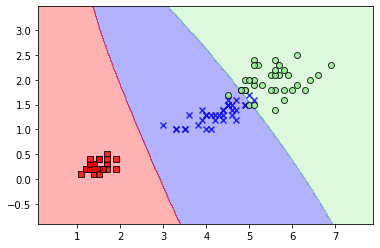

In [15]:
svm_visual.plot_decision_regions(Xtrain, ytrain, svclf2)

/home/centos/머신러닝/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


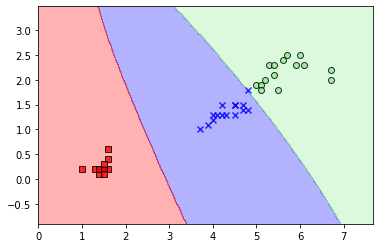

In [16]:
svm_visual.plot_decision_regions(Xtest, ytest, svclf2)